In [1]:
%matplotlib inline

import os
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

/Users/mitchellsuter/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [19]:
# View all available strategies
print(RunManager.get_run_names('StatArbStrategy2'))

         Run     RunDate Completed                             Description  \
0   run_0003  2018-01-08      True                                 Bug fix   
1   run_0004  2018-01-08      True                             Market Rets   
2   run_0005  2018-01-08      True                               Sector 25   
3   run_0006  2018-01-08      True                               Sector 45   
4   run_0007  2018-01-09      True                  Sector 20, more params   
5   run_0008  2018-01-09      True                  Sector 25, more params   
6   run_0009  2018-01-09      True    Sector 20, different holding periods   
7   run_0010  2018-01-09      True                  Sector 20, trade daily   
8   run_0013  2018-01-10      True                    FIRST RUN: Sector 10   
9   run_0014  2018-01-10      True                    FIRST RUN: Sector 20   
10  run_0015  2018-01-10      True                               Sector 15   
11  run_0016  2018-01-11      True                              

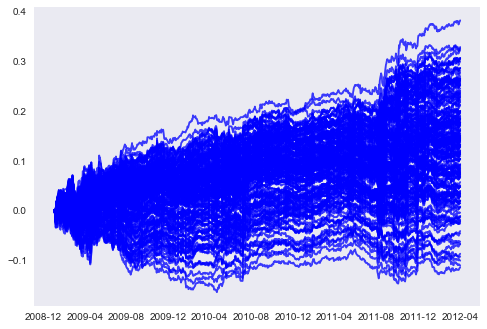

In [35]:
#rm1 = RunManager('StatArbStrategy2', 'run_0007', test_periods=0)
rm1 = RunManager('StatArbStrategy2', 'run_0072', start_year=2009, test_periods=0)

rm1.import_return_frame()

plt.figure()
plt.plot(rm1.returns.cumsum(), 'b', alpha=.5)

plt.grid()
plt.show()

In [36]:
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,daily_drop,False,180,0.171370,0.052660,-999.0
1,daily_drop,True,180,0.093617,0.031548,-999.0
2,data1,1,360,0.132493,0.042104,-999.0
3,entry_day_shift,0,72,0.248160,0.075340,-999.0
4,entry_day_shift,1,72,0.094426,0.027758,-999.0
5,entry_day_shift,2,72,0.068277,0.021895,-999.0
6,entry_day_shift,3,72,0.137698,0.047889,-999.0
7,entry_day_shift,4,72,0.113904,0.037638,-999.0
8,holding_period,2,180,0.132493,0.042104,-999.0
9,holding_period,5,180,0.132493,0.042104,-999.0


In [31]:
comb = CombinationSearch()
comb.add_run(rm1)
comb.start(10, criteria='mean')

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [00:24<00:00,  2.27s/it]


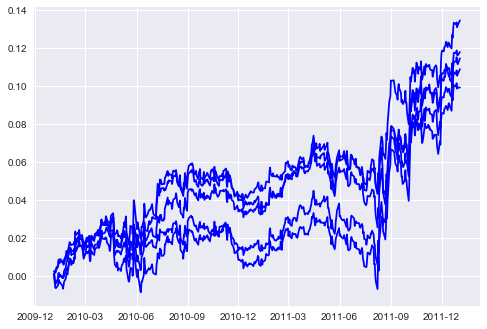

In [32]:
x2 = comb.best_results_rets.dropna()
plt.figure()
plt.plot(x2.cumsum(), 'b')
plt.show()